# APRENDIZAJE AUTOMÁTICO 1

Los datos más usados son los `datos tabulados` que se representan en tablas:
- cada **fila** es un **ejemplo**
- cada **columna** sin tratar es un **atributo** $\rightarrow$ *datos en crudo*
- cada **columna** tratada es una **serie**

#### Descargar base de datos:

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

# bd = pd.read_csv('C:--direccion--/datos.csv', sep=',', decimal='.', header=0, index_col='id')

## 01_Tipos de datos:

### Tipos de datos: (`continuos`, `discretos` y `categóricos`)

Cada columna puede tener tipos de datos diferentes:
- atributos continuos $\rightarrow$ Son aquellos atributos que pueden tomar cualquier valor en un intervalo de $\mathbb R$.
- atrubutos discretos $\rightarrow$ Son aquellos atributos que pueden tomar solo un número finito de valores dentro de un intervalo $(a,b)$.
- atributos categóricos $\rightarrow$ Son aquellos atributos que pueden tomar sólo un número finito de valores dentro de un conjunto que puede no tener una relación de orden entre sus miembros.

Los `dtypes` de un dataframe pueden ser:
- `int64`: Números enteros
- `float64`: Números de punto flotante
- `object`: Tipo general para texto, o columnas mixtas de números y texto
- `bool`: Valores booleanos: True/False
- `datetime64`: Fecha y hora
- `timedelta[ns]`: Diferencias entre dos datetimes
- `category`: Lista finita de valores de texto

### Codificación de valores categóricos:

- Codificación a valores enteros $\rightarrow$ cada categoría se corresponde con un número
- Codificación One-Hot $\rightarrow$ se crea una columna por cada categoría y se indica con 0 o 1 si se pertenece a esa categoría

### Ejemplos:

In [ ]:
# Tipos de datos:
df.info()
N, D = df.shape

In [ ]:
# Codificación a enteros:
df_code = df.copy()
codes = df_code['species'].cat.codes
code_to_categ = dict(zip(codes, df_code['species']))
df_code['species'] = codes

df_code['species'].value_counts()

In [ ]:
# Codificación One-Hot:
df_OneHot = df.copy()
OneHot = pd.get_dummies(df_OneHot['species'])
df_OneHot = pd.concat([df_OneHot, OneHot], axis = 1)

df_OneHot.head(3)

In [ ]:
# Otras opciones de codificación:
df_code_2 = df.copy()
df_code_2['species'] = pd.DataFrame(pd.factorize(df_code_2['species'])[0])
df_code_2['species'].value_counts()

## 02_Separar explorar y rellenar:

`IMPORTANTE`: Realizar este paso antes de codificar los datos categóricos del __df__ para no modificar el __test__

### Separación de datos: 

Es MUY importante separar los datos en `train` y `test` y no mezclar los datos hasta entonces para poder enntrenar bien el modelo.

### Exploración de datos:

Descripción estadística: nos sirve para saber los información importante de los datos con los que vamos a trabajar y hacernos una idea de cómo están descritos.

### Visualización de la distribución:

No siempre vamos a poder visualizar los datos por tener demasiados. Pero si tenemos 'pocos' datos los podemos ver de la siguiente forma:

In [ ]:
pd.plotting.scatter_matrix(df_code, alpha=0.1)

### Tratamiento de valores perdidos:

1) Averiguar dónde están
2) Valorar si __sustituirlos__ (imputación de los valores perdidos) o __eliminar__ el atributo o ejemplo por exceso de valores perdidos
3) Opcionalmente se puede añadir una columna para indicar los valores que han sido sustituidos y los que no

__Imputación Univariada__: consiste en sustituir los valores perdidos por un estadístico de la columna (media, mediana o moda). Lo malo de esta técnica es que puede crear ejemplos imposibles como por ejemplo asignar a una mujer cáncer de próstata.

__Imputación Multivariada__: estima el valor perdido en función del resto de atrubutos del ejemplo.


### Ejemplos:

In [ ]:
# Librerías:
import random
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [ ]:
# Separación de datos en train-test automático:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size= 0.15, random_state= 8)

In [ ]:
# # Separación de datos en train-test manual:
# fraction_test = 0.2

# ind = df.index.tolist()             # Crea una lista con los índices de la bd
# random.shuffle(ind)                 # Desordena los índices

# N_test = int(N * fraction_test)     # Calcula la cantidad de ejemplos que se guardan en test

# # Divide los datos:
# test_df = df.iloc[ind[:N_test]]
# train_df = df.iloc[ind[N_test:]]

In [ ]:
# Exploración de los datos:
print(train_df.info())              # Indica el tamaño, los tipos de datos y cuántos son 'Na' de cada atributo
print('\nLas modas son: \n', train_df.mode(axis=0, dropna=False)) # Devuelve una tabla con las modas de cada atributo
train_df.describe()                 # Indica la descripción estadística básica excepto la moda de cada atributo en forma de tabla

In [ ]:
# Tratamiento de valores perdidos:
missing_data = train_df.isna()
missing_data.sum()

missing_values_per_column = missing_data.sum(axis=0)    # 'NA' por cada columna
missing_values_per_row = missing_data.sum(axis=1)       # 'NA' por cada fila

mask_mayorq0 = missing_values_per_column > 0            # Crea una máscara de Pandas para indicar si hay columnas con NA
mask_mayorq1 = missing_values_per_row > 0               # Crea una máscara de Pandas para indicar si hay filas con NA

print(f'Columnas con valores nulos:\n{missing_values_per_column[mask_mayorq0]}\n')
print(f'Filas con valores nulos:\n{missing_values_per_row[mask_mayorq1]}\n')

missing_count_row = missing_values_per_row.value_counts().sort_index()
print(f'Valores NaN en cada fila:\n{missing_count_row}')
missing_count_col = missing_values_per_column.value_counts().sort_index()
print(f'Valores  NaN en cada columna:\n{missing_count_col}')

In [ ]:
# # Elegir una de las siguientes opciones para tratar los valores perdidos:

# # Eliminar filas:
# if missing_count_row.index[-1] > 0:                                         # Calcular la cantidad máxima de valores nulos por fila
#     mask_toDrop = missing_values_per_row >= missing_count_row.index[-1]     # Filtro que busca las filas con el número de valores perdidos máximo
#     drop_list_row = missing_values_per_row[mask_toDrop].index.tolist()      # Crea una lista de índices de las filas que cumplen con la condición
#     train_df.drop(drop_list_row, axis=0, inplace=True)                              # Eliminar las filas guardadas en 'drop_list' del DataFrame original
# # Eliminar columnas:                                      
# if missing_count_col.index[-1] > 0:                                         # Calcular la cantidad máxima de valores nulos por columna
#     mask_toDrop = missing_values_per_column >= missing_count_col.index[-1]  # Filtro que busca las filas con el número de valores perdidos máximo
#     drop_list_col = missing_values_per_column[mask_toDrop].index.tolist()   # Crea una lista de índices de las columnas que cumplen con la condición
#     train_df.drop(drop_list_col, axis=1, inplace=True)                              # Eliminar las columnas guardadas en 'drop_list' del DataFrame original, al usar implace no hace falta poner 'df = ...'
# # Tamaño del DataFrame redimensionado:
# train_df.shape


# # Imputación univariada de los datos NaN:
# train_df.fillna(train_df.median(axis=0), inplace=True)    # Sustituye los valores NaN por el valore de la mediana
# train_df.shape
# # Se pueden sustituir por la media o el valor más repetido (moda)


# # Imputación multivariante de los datos NaN:
# imputer = IterativeImputer()
# train_imputed = imputer.fit_transform(train_df)
# train_imputed = pd.DataFrame(train_imputed, columns=train_df.columns)       # Convertir de nuevo a DataFrame
# train_imputed.isna().sum()                                                  # Recuento de NaN

## 03_Ingeniería_características:

La tabla de datos de la que aprende nuestro modelo se divide en filas (ejemplos) y columnas (atributos). 

En ocasiones estos atributos son suficientes para entrenarlo (sin modificaciones) pero otras muchas no. Llamaremos __vector de características__ al vector con el que describimos a cada ejemplo a la hora de realizar el entrenamiento.

El vector de características puede ser:
- __Menor__: si hemos eliminado atriburos porque no eran útiles
- __Mayor__: si hemos añadido nuevas columnas a las que ya había inicialmente
- __Igual__: si nos quedamos con el mísmo número de atributos con los que empezamos al principio

### Aumento de la dimensionalidad:

Añadimos nuevas características a partir de las que temenos. Por ejemplo, el número de habitantes de una población y la superficie de un país no nos aporta tanta información por separado como nos podría aportar la densidad de población de ese país.

$$\text{Densidad de población} = \frac{\text{Población}}{\text{Superficie}}$$

Esto es complicado hacerlo si tenemos demasiados atributos como para poder verlos todos, por lo que una posible solución es lanzar una batería de transformaciones de cierto grado polinómico (a nuestra elección) para luego eliminar las que no tengan relevancia en el modelo.

### Reducción de la dimensionalidad:

Los siguientes `temas` están íntegramente dedicados a estas técnicas.

### Transformaciones sin modificar la dimensionalidad:

También podemos considerar modificar un atributo aunque no se cree otro nuevo.

Vamos a ver transformaciones lineales (`escalados`):
1) Intervalo unidad
2) Máximo en valor absoluto
3) Estandarización

#### 1. Escalado al intervalo unidad:

Podemos modificar todos los valores de cada atributo y reescribirlos en una escala $[0, 1]$ en la que 0 será el $x_{min}$ y 1 será $x_{max}$.

`IMPORTANTE`: este escalado hay que realizarlo columna a columna debido a que cada una tiene un valor máx. y mín. diferente. <br>
`IMPORTANTE`: Es sensible a valores atípicos. Útil si se manejan datos muy diferentes y se quiere conservar la estructura de los datos originales.

La fórmula para realizar esto sería:
$$x_{esc} = \frac{x - x_{min}}{x_{max} - x_{min}}$$
Aunque podemos utilizar `sklearn.preprocessing.MinMaxScaler`

#### 2. Escalado al máximo en valor absoluto:

Podemos modificar todos los valores de cada atributo y reescribirlos en una escala $[-1, 1]$ en la que el $-1$ será el $x_{min}$ y 1 $x_{max}$.

`IMPORTANTE`: este escalado también hay que hacerlo columna a columna ya que el valor máx. y mín. es diferente para cada una. <br>
`IMPORTANTE`: útil cuando los datos pueden tener tanto valores positivos como negativos y se quiere mantener esta característica en los datos escalados.

La fórmula para realizar esto sería:
$$x_{esc} = \frac{x}{max(|x|)}$$
Aunque podemos utilizar `sklearn.preprocessing.MaxAbsScaler`

#### 3. Estandarización:

Dada una columna $x$, con media $\mu$ y desviación $\sigma$, entonces la siguiente fórmula *estandariza* todos los valores de dicha columna consiguiendo media 0 y desviación típica 1.
$$x_{\rm std} = \frac{x - \mu}{\sigma}$$
Podemos utilizar `sklearn.preprocessing.StandardScaler`

Esta _estandarización_ permite poder comparar y analizar atributos de forma precisa debido a que coloca los atributos en una escala común. <br>
__Esta técnica es menos sensible a valores atípicos que las vistas anteriormente, por lo que es una buena opción si los datos tienen muchos valores atípicos.__

Esta técnica se suele usar en __Análisis de componentes principales (PCA)__, __Análisis discriminante lineal (LDA)__ y ayuda en el cálculo de algoritmos como pueden ser __regresión logística__ o __análisis de conglomerados (clustering)__ entre otros.

### Ejemplos:

In [ ]:
# Librerías:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler

In [ ]:
# Aumento de la dimensionalidad:
degree = 2
interaction_only = True    # Si es 'True' sólo calcula las interacciones entre coumnas diferentes

polyf = PolynomialFeatures(degree= degree, interaction_only= interaction_only)
polyf.set_output(transform= "pandas")

polyf.fit(df_code)                         # NO EJECUTAR ESTA LÍNEA CON EL TEST NUNCA. Ya que es el comando de aprendizaje.
df_code_dim = polyf.transform(df_code)    # Adapta todos los datos a las nuevas características

print('DataFrame sin dimensionar:\n', df_code.head(), '\n\n')
print('DataFrame dimensionado:')
df_code_dim.head()

In [ ]:
# Esclalado al intervalo unidad [0, 1]:
train_df_scalerUnit = MinMaxScaler()#.ser_output(transform="pandas")
train_df_scalerUnit.fit(df_code_dim)   # Almacena el mín y máx de cada columna
train_df_scalerUnit = train_df_scalerUnit.transform(df_code_dim)

print(f'\n---Tras el escalado a [0,1] de cada columna----')
print(train_df_scalerUnit)

# Escalado al máximo de los valores absolutos:
train_df_scalerMaxAbs = MaxAbsScaler()#.ser_output(transform= "pandas")
train_df_scalerMaxAbs.fit(df_code_dim) # Almacena el valor max de cada columna
train_df_scalerMaxAbs = train_df_scalerMaxAbs.transform(df_code_dim)

print(f'\n---Tras el escalado al maximo de los valores absolutos de cada columna----')
print(train_df_scalerMaxAbs)

# Estandarización:
train_df_scalerStd = StandardScaler()#.ser_output(transform= "pandas")
train_df_scalerStd.fit(df_code_dim)    # Estandariza los datos para que la media sea 0 y la desviación típica 1 (o valores aprox)
train_df_scalerStd = train_df_scalerStd.transform(df_code_dim)

print(f'\n---Tras la estandarización de cada columna----')
print(train_df_scalerStd)

## 04_Reducción_filtrado:

En este tema se explican métodos de filtrado univariados.

Esto significa que para cada característica de la tabla se calcula una puntuación (_score_) de cuánta relevancia tiene. Se eliminan todas aquellas características cuya puntuación no supera un umbral (_threshold_) elegido por nosotros. Por este motivo también se dice que son __técnicas de selección de características.__

Vamos a aprender a filtrar por:
- Varianza
- Correlación
- Información mutua

### Filtrado por Varianza:

La varianza es el promedio de las diferencias con la media elevadas al cuadrado.<br> Y la desviación estandar es la raíz cuadrada de la varianza.
$${\rm Var}(x) = \frac{1}{N} \sum\limits_{k=1}^N\left(\mu - x_k\right)^2.$$
<br>

__El filtrado por varianza consiste en eliminar todas aquellas columnas cuya varianza no supere un cierto umbral.__ Cuanto más separados estén los datos mejor. 

__¿Qué ocurre si una característica tiene una varianza pequeña?__

En el caso extremo en el que ${\rm Var}(x) = 0$ (ya no puede ser más pequeña), la culumna NO está aportando nada devido a que todos los valores de la columna son idénticos.

__Beneficios de la varianza:__
1. __Información:__ Los datos con mayor varianza suelen contener más información y detalles. Si todos los datos son muy similares (baja varianza), entonces no hay mucho que aprender de ellos.

2. __Rendimiento del modelo:__ Muchos modelos de aprendizaje automático asumen que todas las características son igualmente importantes. Si una característica tiene una varianza muy baja (es decir, los valores son casi iguales para todas las muestras), entonces esa característica puede no aportar mucha información útil para el modelo, y puede ser ignorada por el modelo.

3. __Detección de valores atípicos:__ La varianza puede ayudar a detectar valores atípicos en los datos. Los valores atípicos son observaciones que se desvían significativamente de las otras observaciones. Son importantes porque pueden indicar variabilidad en los datos, errores de medición, o áreas interesantes para futuras investigaciones.

4. __Evitar el sobreajuste:__ Si los datos tienen poca varianza, un modelo puede sobreajustarse a los datos de entrenamiento y tener un rendimiento deficiente en los datos de prueba. La varianza puede ayudar a evitar el sobreajuste al proporcionar una gama más amplia de valores para el modelo para aprender.

__`Atención:`__

La varianza es **sensible** al orden de magnitud de los datos, por lo que si escalamos los datos al intervalo unidad, estaremos cambiando su varianza.

Esto puede venir bien si la varianza de los datos es en un principio demasiado pequeña pero al cambiar los datos al intervalo unidad las varianzas tienen mayor valor. 

### Filtrado por correlación:

Si dos características están correlacionadas significa que entre ambas existe una relación lineal. Por lo que si una crece o decrece, la otra lo hace proporcionalmente.<br>
Por lo tanto no necesitamos ambas ya que una nos aporta exáctamente la misma información que la otra, salvo por una escala y, quizás, un desplazamiento.

Pero esto sólo ocurre si la correlación entre ambas es de $+1$ o $-1$. Cuanto más cerca a los extremos, mayor correlación.

Así que otro modo de filtrar características es obtener la matriz de correlación y buscar las celdas de la matriz próximas a $+1$ y $-1$.

__El filtrado por correlación tiene DOS características importantes:__

- No se ve afectado por la escala
- `Es más eficiente en problemas de regresión que en problemas de clasificación`

### Ejemplo:

In [ ]:
# Librerías:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Filtrado por varianza:
selector = VarianceThreshold(threshold=0.1)     # 'threshold=0.1' indica el mínimo valor que debe tener la varianza
selector.set_output(transform='pandas')

selector.fit(df_code_dim)
df_filtered = selector.transform(df_code_dim)

print('Tamaño del df original: ', df_code_dim.shape)
print('Tamaño del df filtrado: ', df_filtered.shape)

# repetimos el ejemplo pero escalando al intervalo unidad antes del filtrado
selector.fit(train_df_scalerMaxAbs)
df_filtered_2 = selector.transform(train_df_scalerMaxAbs)

print('Tamaño del df escalado y filtrado: ', df_filtered_2.shape)

In [ ]:
# matriz de correlación
correlation_matrix = df_filtered.corr()
correlation_matrix['species']

In [ ]:
# Especificar la columna de interés
columna_interes = 'species'

# Lista de características con correlación > 0.94 respecto a la columna de interés:
caracteristicas_correlacionadas = correlation_matrix.index[correlation_matrix[columna_interes].abs() > 0.94].tolist()

# Obtener la correlación máx de las correlaciones:
correlaciones = correlation_matrix[columna_interes].drop(columna_interes)
max_correlation = correlaciones.abs().max()

# Excluir la característica más alta y la de interés:
caracteristicas_correlacionadas.remove(correlaciones[correlaciones.abs() == max_correlation].index[0])
correlaciones = caracteristicas_correlacionadas.remove(columna_interes)

# Eliminar las características correlacionadas del DataFrame
df_filtered.drop(columns=caracteristicas_correlacionadas, inplace=True)
print('\n\nTamaño del df filtrado: ', df_filtered.shape)

## 05_PCA: *Análisis de componentes principales*

`Primero se estandariza (la media de cada columna sea 0 y desviación típica 1) y luego se aplica el PCA`

__PCA__ es una técnica para sustituir con nuevas características calculadas mediante combinaciones lineales las que teníamos inicialmente. Al ser una técnica de reducción de dimensón las nuevas características que sustituyen a las originales son (en total) menos.

El problema que tenemos que resolver es __cómo caluclar los coeficientes__

Al aplicar PCA reducimos el número de columas de la tabla de datos, de $D$ a $d$ ($~d\le D.$).<br>
Las columnas del conjunto de datos original son "características" y por tanto se representan por la letra $x$.<br>
Las columnas del conjunto reducido son "componentes principales" y se representan por la letra $z$.

__`Autovector:`__ Un autovector de una matriz es un vector que, cuando se multiplica por la matriz, da como resultado el mismo vector multiplicado por un escalar. En PCA, cada autovector representa una dirección en el espacio de características. Los autovectores se utilizan para definir los nuevos ejes del sistema transformado.

__`Autovalor:`__ Un autovalor es el escalar por el cual se multiplica un autovector cuando se multiplica por la matriz. En PCA, cada autovalor representa la varianza de los datos a lo largo del autovector correspondiente. Los autovalores indican la “importancia” de los respectivos autovectores en la representación de la estructura de los datos. Un autovalor grande significa que la dirección del autovector correspondiente es importante para describir la distribución de los datos.

En PCA, se calculan los autovectores y autovalores de la matriz de covarianza de los datos. Luego, se ordenan los autovectores en función de sus autovalores correspondientes, de mayor a menor. Esto proporciona las direcciones (componentes principales) en las que los datos varían más. Al proyectar los datos en estas direcciones, __PCA logra reducir la dimensionalidad de los datos mientras conserva la mayor cantidad de varianza posible__.

*Propiedades**
>- Una matriz cuadrada ${\bf A} \in \mathbb R ^{n\times n}$ tiene $~n~$ autovalores sólo si su determinante $|{\bf A}|\neq 0$.<br>
<small>Si la matriz no es cuadrada o no tiene determinante distinto de cero entonces **no** tiene autovalores.</small>
- Los autovalores no tienen por qué ser todos distintos.
- Sea ${\bf X} \in \mathbb R ^{n\times m}$ (por tanto NO cuadrada),
si $\lambda$ es autovalor de ${\bf X}^\top
{\bf X}$ también lo es de ${\bf X}
{\bf X}^\top$ 

### Ejemplo:

In [ ]:
# Librerías:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# Estandarizamos primero:
print('Tamaño del DataFrame original: ', df_code_dim.shape)

scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(df_code_dim)
df_code_dim_std = scaler.transform(df_code_dim)

# PCA seleccionando diréctamente el número de componentes o un porcentaje de información que queremos mantener:
n_components = 0.95 # si se pone un núm. entero (3) sería el núm. de columnas que mantendríamos

pca = PCA(n_components= n_components).set_output(transform='pandas')
pca.fit(df_code_dim_std)
df_pca = pca.transform(df_code_dim_std)

print('Tamaño del nuevo DataFrame: ', df_pca.shape, f'\n\nTabla con los componentes principales hasta explicar el {n_components*100}% de la varianza')
print(df_pca.head())

In [ ]:
# Visualización del peso de cada columna calculada:

def plot_PCA(pca):
  plt.stem(pca.explained_variance_ratio_.cumsum(),'b')
  plt.stem(pca.explained_variance_ratio_,'r')

  titleStr = 'Varianza explicada por cada componente principal (rojo)'
  titleStr = titleStr+'\n'
  titleStr = titleStr+'Varianza explicada acumulada con cada componente principal (azul)'
  plt.title(titleStr, fontsize=10)
  ax = plt.gca()
  ax.axis([-0.1,1.1,0,1])
  ax.set_xticks([i for i in range(pca.n_components_)])
  ax.set_xticklabels(["pca"+str(i) for i in range(pca.n_components_)])

  fig = plt.gcf()
  fig.set_size_inches(6,2)

  plt.show()

plot_PCA(pca)

## 06_Visualizar_elementos_básicos: (`TEMA Casi-Irrelevante`)

__Puntos, rectas, planos e hiperplanos__

Al terminar este cuaderno habremos repasado algunos conceptos de geometría que serán imprescindibles de aquí en adelante.<br>
El más importante de todos es posiblemente el hecho de que:
- un hiperplano es una combinación lineal de variables que da como resultado 0,
- y modificando su vector característico modificamos todo el hiperplano.

De paso veremos _trucos_ de código para representar conjuntos de datos e incluso clasificadores.

In [ ]:
# Librerías:
import pandas as pd
import numpy as np

### Puntos:

Si vamos a representar puntos en un plano estamos asumiendo que tienen 2 coordenadas.

In [ ]:
# Representación de puntos en un plano:

x_feature = 'petal length (cm)'
y_feature = 'sepal length (cm) petal width (cm)'
mark_size = 10
alpha = 0.4

df_code_dim.plot.scatter(x=x_feature, y=y_feature, s=mark_size, alpha=alpha)

In [ ]:
# Representación de puntos en un espacio 3D:

x_feature = 'petal length (cm)'
y_feature = 'sepal length (cm) petal width (cm)'
z_feature = 'species'
mark_size = 10
alpha = 0.4

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_code_dim[x_feature], df_code_dim[y_feature], df_code_dim[z_feature],
           s=mark_size, alpha = alpha)
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)

plt.show()

Tambień es posible mostrar puntos de hasta 6 dimensiones un plano utilizando _trucos_ como cambiar el tamaño del marcador, el color, etc.

### Rectas:

Una recta se define a partir de un punto que se traslada en una dirección marcada por un vecotr director __V__.

Para mostrar una recta necesitamos un espacio de dimensión $D \ge 2$. Cuando $D = 2$ podemos dar su expresión matemática con una ecuación implícita y/o explícita.

__Ecuación implícita:__ La recta pasa por el punto $(a, b)$ y el vector director __v__ = $(v_1, v_2)^T$ Todos los punto del espacio $x = (x_1, x_2) \in\mathbb R ^2$ contenidos en la recta que satisfacen:
$$
w_0 + w_1x_1 + w_2x_2 = 0, \\\text{tal que} \left\lbrace
  \begin{array}{l}
  w_0=a\frac{v_2}{v_1} - b \\
  w_1=-\frac{v_2}{v_1} \\
  w_2=1\\
  \end{array}
\right.
$$
*(Donde $w_0$ es $(0, b)$ y el vector es $(w_1, w_2)$)

__Ecuación explícita:__ Si colocaos $x_1$ en el eje horizontal y $x_2$ en el eje vertical podemos generar puntos de la recta dando valores a $x_1 \in\mathbb R$ y obteniendo $x_2$ mediante la ecuación:
$$
x_2 = \left(\frac{v_2}{v_1}\right)x_1 + \left(b-a\frac{v_2}{v_1}\right),
$$
o como se suele ver: <br>
$$x_2 = mx_1 + x_0,$$
donde $x_0$ es el **punto de intercepción** de la recta con el eje vertical: $x_0 \Rightarrow (0, x_2)$

__Vector característico:__ Es el vector perpendicular al vector director y se define: $$c = (c_1, c_2)^T$$

In [ ]:
# Ejemplo de recta con vector director 'v' y un punto de intercepción 'x0':

x0 = 3
v = [-1., -2.]

m = v[1]/v[0]
x1 = np.linspace(-3,3,10)
x2 = x0 + m*x1

# recta
plt.plot(x1,x2,'b', alpha=0.4)
# punto de intercepción
plt.scatter(0,x0,c='k',s=30)
plt.text( 0,x0, ' $x_0$', fontsize=12, color='black')
# origen de coordenadas
plt.scatter(0, 0,  s=60, marker='+', c='k')
# vector director v
plt.arrow(0, 0, v[0], v[1], head_width=0.2, head_length=0.3, fc='black', ec='black')
plt.text( v[0], v[1], ' v', fontsize=12, color='black')
# vector característico c
plt.arrow(0,0, -m, 1., head_width=0.2, head_length=0.3, fc='red', ec='red')
plt.text( -m, 1., ' c', fontsize=12, color='red')

plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.axis('equal')
plt.show()

### Planos:

Una plano  se define a partir de un punto que se traslada por la superficie perpendicular al vector _característico_ $\bf c$.

> En un plano **no** podemos hablar de un vector director.<br> En todo caso sería de dos vectores generadores $~{\bf u}_1~$ y $~{\bf u}_2~$ tal que $~{\bf c} = {\bf u_1}\wedge {\bf u_2},~$ donde $\wedge$ es el producto vectorial.

Para mostrar una plano necesitamos un espacio de dimension $D\ge 3$.

**Ecuación implícita**$\quad$
La plano que pasa por el punto $(p,q,r)$ y tiene vector característico ${\bf c} = (c_1, c_2, c_3)^\top $ son todos aquellos puntos del espacio $x=(x_1, x_2, x_3)\in\mathbb R ^2$ que satisfacen:
$$
c_0 + c_1x_1 + c_2x_2 + c_3x_3= 0, \\\text{tal que }
  \begin{array}{l}
  c_0=-\big(pc_1 + qc_2 + rc_3\big)\\
  \end{array}
$$

Es frecuente simplificar eligiendo directamente el valor del **término independiente** $~c_0.~$

**Ecuación explícita**$\quad$ Si colocamos $x_1$ en un eje horizontal y $x_2$ en el otro eje horizontal podemos generar puntos del plano dando pares $(x_1, x_2)\in \mathbb R^2$ y obteniendo $x_3$ en el eje vertical simplemente despejandolo
$$
x_3 = \left(-\frac{c_1}{c_3}\right)x_1
    + \left(-\frac{c_2}{c_3}\right)x_2
    + \left(-\frac{c_0}{c_3}\right)
$$
A partir de esta ecuación es fácil obtener el punto de intercepción del plano con el eje vertical. <br>Basta con hacer $~x_1=x_2=0.$

In [ ]:
# Ejemplo de recta con vector director 'c' y término independiente 'c_0'

c0 = 3
c = [2,.3,1]

x1 = np.linspace(-5,5,5)
x2 = np.linspace(-5,5,5)
xx1,xx2 = np.meshgrid(x1,x2)

intercep = (-c0/c[2])
x3 = intercep + (-c[0]/c[2])*xx1 + (-c[1]/c[2])*xx2

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# recta
surf = ax.plot_surface(xx1,xx2,x3, cmap='jet', alpha=0.5,
                       linewidth=0, antialiased=False)
# punto de intercepción
ax.scatter(0,0,intercep,c='k',s=30)
ax.text( 0, 0, intercep, ' $x_0$', fontsize=12, color='black')
# origen de coordenadas
ax.scatter(0, 0, 0, s=60, marker='+', c='k')
# vector director c
ax.quiver(0, 0, 0, c[0], c[1], c[2])
ax.text( c[0], c[1], c[2], ' c', fontsize=12, color='black')

ax.grid()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.axes.set_xlim3d(-5, 5)
ax.axes.set_ylim3d(-5, 5)
ax.axes.set_zlim3d(-5, 5)
ax.set_box_aspect([1.0, 1.0, 1.0])
plt.show()

### Hiperplanos:

Una hiperplano en la generalización a $D$ dimensiones de un plano.

Viene definido por un vector característico ${\bf c}=(c_1,\ldots,c_D)^\top$ y un término independiente $c_0$; <br> y su ecuación implícita es
$$
c_0 + c_1x_1 + \cdots + c_Dx_D =  0,
$$
que se suele simplificar utilizando el producto escalar del vector característico por un vector de variables ${\bf x} = (x_1,\ldots,x_D)^\top$; <br>
es decir
$$
c_0 + {\bf c}^\top {\bf x} = 0
$$

Evidentemente, ya no podemos representarlo en una pantalla.

Como podemos ver, la ecuación implícita del hiperplano, y de todos los demás elementos que hemos visto de dimensión menor, es la **combinación lineal** de las variables, donde los coeficientes son precisamente el  vector característico.
<br>
Los puntos del hiperplano son aquellos que satisfacen la ecuación, es decir que al evaluarlos dan 0.

<u>¿ Y el término independiente ?</u>

A veces se añade una variable _dummy_ para "eliminarlo" de la expresión.

Una variable _dummy_ es una variable fija a 1, de manera que el vector de variables pasa a ser $~{\bf x} = (1, x_1, x_2, \ldots, x_D)^\top.$

Entonces la ecuación implícita del hiperplano queda simplemente:
$$
{\bf c}^\top {\bf x} = 0,
$$
donde ahora ${\bf c} = (c_0, c_1, \ldots, c_D)^\top.$

## 07_Modelos_lineales:

Existen dos grandes problemas de __aprendizaje supervisado__:
- Regresión
- Clasificación

*(aunque realmente son el mismo ya que una regresión es lo mismo que una clasificación con infinitas clases)

### Regresión:

Consiste en aprender a emparejar los ejemplos dados con un valor objetivo o *target* que toma valores en un intervalo continuo.
> Ejemplos:
- Estimar el precio de una casa en función de una serie de características
- Estimar la probabilidad de que un paciente desarrolle una enfermedad a partir de su historial
- ...

### Clasificación:

Consiste en aprender a emparejar los ejemplos dados con un valor discreto, denominado **etiqueta, clase** o *label*. A veces toma valores dentro de un conjunto de categorías, por ejemplo *{rojo, verde azul}*. En ese caso se hace una codificación con entero o una *One-Hot*.

Cuando sólo hay dos clases se dice que es binario o de clasificación binaria. 

> Ejemplos
- Estimar la enfermedad dado un conjunto de síntomas.
- Estimar si un correo electrónico entrante es o no _spam_
- ...

### En ambos casos:


En problemas supervisados **siempre** tendremos:
- Un conjunto de datos que consiste en:
    - $N$ ejemplos $D$ dimensionales
    - tal que cada ejemplo está emparejado con su valor objetivo
- y un modelo para aprender a emparejar cada ejemplo con su valor objetivo (para regresión) su etiqueta (para clasificación).

Y en ambos casos también nuestro objetivo es **ESTIMAR** con la mayor tasa de acierto posible el valor objetivo o la etiqueta de los ejemplos **nuevos** que lleguen a partir del momento en el que pongamos nuestro sistema a funcionar.

### Modelo lineal:

Es aquel en el que la salida del modelo es una combinación lineal de la entrada y los parámetros.
Es decir
$$
f({\bf x};{\bf w}) = w_0 + w_1x_1 + \cdots + w_Dx_D.
$$

La relación entre un modelo lineal y un hiperplano es evidente.<br>
Dado un modelo lineal, existe un hiperplano cuyo vector característico es ${\bf w} = (w_1,\ldots,w_D)^\top$ y término independiente es $w_0$ tal que $~w_0 + {\bf w}^\top{\bf x} = 0.$

#### Modelo lineal de regresión:

$$\hat y = w_0 + {\bf w}^\top{\bf x},$$
donde $\hat y$ es la estimación que hace el modelo para el ejemplo $\bf x$ dado con los parámetros escogidos.

El modelo lineal de regresión es lo que obtenemos al **ajustar por mínimos cuadrados** un conjunto de pares de puntos, pero generalizado a $D\ge 2$ dimensiones.

__Desventajas:__<br>
Este método es costoso computacionalmente cuando $X$ es muy grande. Existen otros métodos para hacerlo más eficiente, pero la solución más adoptada es utilizar el **descenso de gradiente**

### Ejemplo:

In [ ]:
from sklearn import linear_model

# Entrenamos el modelo:
reg_Tema07 = linear_model.LinearRegression()
reg_Tema07.fit(df_pca, df_OneHot['setosa'])
prediccion = reg_Tema07.predict(df_pca)

In [ ]:
# Representación gráfica:
import seaborn as sns

# Graficar datos reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca.iloc[:, 0], y=df_pca.iloc[:, 1], hue=df_OneHot['setosa'], palette='Set1', legend='full')
plt.title('Predicción con Regresión Lineal')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Especies')
plt.show()

## 08_Regresión_logística:

### Función Logística:

Es una función Sigmoide* en particular: *(Sigmoide significa que tiene forma de _S_)
$$S(x) = \frac{1}{1+e^{-x}}$$
> donde $x$ hace referencia a la entrada de la función, no a un ejemplo del conjunto de datos.

Esta función tiene las siguientes propiedades:
- Es continua y siempre creciente
- $\quad \lim\limits_{x\rightarrow -\infty} S(x) = 0$
- $\quad \lim\limits_{x\rightarrow +\infty} S(x) = 1$

Por tanto **cumple las condiciones para ser una distribución de probabilidad** (_Cumulative Distribution Function_ o CDF).

In [ ]:
#-- Función sigmoide --#
# Crear la función logística para un array de Ns elementos
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Generar un rango de valores para x
Ns = 100   #<- Número de muestras en el eje horizontal (x)
bound = 10 #<- límites de la figura en horizontal: [-bound, +bound]
x = np.linspace(-bound, bound, Ns)

# Calcular los valores de la función logística para cada valor de x
y = logistic(x)

# Dibujar
plt.plot(x, y)

plt.title('Función logística')
plt.xlabel('$x$'); plt.ylabel('$S(x)$')
plt.grid()
plt.show()

**¿La regresión logística es un modelo lineal?**

La utilización de la función logística, que obviamente es una función NO lineal, da lugar a esta duda.

En realidad es un **modelo lineal generalizado** ya que los logits sí se calculan mediante un modelo lineal.

La función logística simplemente nos sirve para dar una estimación de la probabilidad de pertenecer a una clase; pero el modelo de los datos sigue siendo un modelo lineal.

### Regresión logística:

En el tema `07_Modelos_lineales` obtuvimos un clasificador mediante regresión, lo que buscamos ahora es dividir con una función sigmoide cada etiqueta.

La función sigmoide satura los datos creando mucha separación entre ambas clases para que estas no se mezclen, convirtiéndolo a una medida de la probabilidad de que el ejemplo pertenezca a una de las dos clases.

Sea **Logit** el nombre que recibe el resultado de la función lineal $ ~~f({\bf w},{\bf x}) = {\bf w}^\top{\bf x}.$

Entonces, la función logística aplicada al logit nos devuelve una medida de la probabilidad de que $\bf x$ pertenezca a la clase "$+1$", más exactamente:
$$
 \Pr(y=+1|\text{logit}={\bf w}^\top{\bf x}) =
\frac{1}{1+e^{-{\bf w}^\top{\bf x}}}
$$

### Ejemplo:

In [ ]:
reg = linear_model.LinearRegression()

# Creamos una copia de nuestro DataFrame para entrenar el modelo
df_lm = df_pca.copy()   # NO ES NECESARIO

# Entrenamos el modelo de regresión lineal
reg.fit(df_lm, df_OneHot['setosa'])
print(f'Los parámetros aprendidos para un modelo lineal son:')
print(f' w = {reg.coef_} , w0 = {reg.intercept_:0.2f}')

In [ ]:
# Obtenemos los logits:
logit = reg.predict(df_lm)

# Convertimos los logits en probabilidad de pertenecer a la clase "1":
def logistic_fun(x):
    return 1 / (1 + np.exp(-x))

# Añadimos los logits y la p(y = 1) al DataFrame:
df_lm["logit"]=logit
df_lm['p(y=1)']=logistic_fun(logit)
df_lm.head()

In [ ]:
colors=df_lm['p(y=1)'].copy()
colors[colors==1]='b'
colors[colors==-1]='r'
df_lm.plot.scatter(x='logit', y='p(y=1)', c=colors, s=30, alpha=0.5)
range_logit = np.linspace(-5,5,30)
plt.plot(range_logit, logistic_fun(range_logit), 'y--')
plt.grid()
plt.show()

**En definitiva**<br>
La regresión logística nos devuelve una medida de la probabilidad de que un ejemplo dado pertenezca a una clase y por tanto también una medida de probabilidad de pertenecer al resto de clases (o a la otra clase si solo hay dos)

## 09_Descenso_gradiente: `Todo teoría`

### Teoría:

El término **descenso del gradiente** agrupa un conjunto de métodos de optimización numérica.

> **¿Qué es un gradiente?**<br>
Es un vector que marca la dirección de máxima pendiente de una función en un punto dado.

> **¿Qué requisitos debe haber para tener un gradiente?**<br>
La función $\mathcal L$ debe ser **derivable** en todas las direcciones.

En la imágen, si seguimos el gradiente (en un punto cualquiera) subimos y subimos sin parar. <br>
Pero de una parábola lo interesante es saber en qué punto se encuentra el mínimo $\rightarrow$ Siguiendo el gradiente NUNCA vamos a llegar a él.

Para encontrar el mínimo siguiendo el gradiente debemos **dar la vuelta a la función**

In [ ]:
#-- Dibujo del hiperplano --#
# Definir la función de la parábola
def fun_L(x, y):
    return x**2 + y**2

# Definir la función del gradiente
def fun_grad_L(x, y):
    return np.array([2*x, 2*y])

# Hacer un barrido del espacio 2D
bound = 4 #<- límites del intervalo en un eje = [-bound, bound]
Ns = 12   #<- cuantas muestras tomo en ese intervalo

w1 = np.linspace(-bound, bound, Ns)
w2 = np.linspace(-bound, bound, Ns)
ww1,ww2 = np.meshgrid(w1,w1)

# calculo de L y gradiente de L
L = fun_L(ww1,ww2)
grad_L = fun_grad_L(ww1,ww2)

# Dibuja la parabola mediante 25 curvas de nivel
ax = plt.axes(projection='3d')
ax.contour3D(ww1, ww2, L, 25, cmap='cool')

# Proyecta algunas curvas de nivel en el espacio 2D de w=[w1,w2]
ax.contour(ww1, ww2, L, levels=[0,2,4,8,16,30], linestyles='--',
            zdir='z', offset=0, cmap='cool')

# Crear un gráfico de vectores para el gradiente
ax.quiver3D(ww1, ww2, np.zeros_like(ww1),
            grad_L[0,:,:], grad_L[1,:,:], np.zeros_like(ww1),
            length=0.1, arrow_length_ratio=0.3, normalize=False,
            colors='gray', alpha=0.5)

# Agregar etiquetas y mostrar
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.axis('tight')
plt.show()


### Algoritmo _Descenso de gradiente_:

El _Descenso del gradiente_ es un algoritmo para localizar el mínimo de una función de manera itereativa.<br>

En cada iteración nos desplazamos por $\bf w$ en la dirección que marca el gradiente de $\mathcal L$. <br>
El algoritmo comienza en un punto aleatorio, y el desplazamiento produce un nuevo punto. Este proceso se repite, tomando como punto de partida el punto alcanzado en la iteración anterior, hasta que se cumple una condición de parada.

**Condición de parada** (_eval stop_)
> El algoritmo se detiene si ocurre alguno de los dos casos siguientes:
- El número iteraciones alcanza un tope
- El valor de $\mathcal L~$ ya no decrece más.

<br><br>
En el descenso de gradiente, se actualizan los parámetros del modelo en la dirección opuesta al gradiente de la función de pérdida. El ratio de aprendizaje determina cuánto avanzamos en la dirección del gradiente. Aquí tienes una representación de cómo se actualiza un parámetro en el descenso de gradiente:
$$\theta = \theta - \eta \cdot \nabla_{\theta} J(\theta)$$

Donde:

- $θ$ son los parámetros del modelo.
- $η$ es el ratio de aprendizaje.
- $∇_θ​J(θ)$ es el gradiente de la función de pérdida J con respecto a los parámetros θ.

Si el ratio de aprendizaje es muy grande, los pasos serán muy grandes y el algoritmo puede no converger o incluso divergir. Si el ratio de aprendizaje es muy pequeño, los pasos serán muy pequeños y puede que se necesite mucho tiempo para converger, o que el algoritmo se quede atascado en un mínimo local.
Por lo tanto, elegir un buen valor para el ratio de aprendizaje es crucial para el rendimiento del algoritmo de descenso de gradiente

## 10_Minimizar_perdida: 
(`Uso del Descenso de gradiente para mejorar el modelo`)

`El algoritmo de descenso de gradiente nos permite resolver cualquier problema de optimización de aprendizaje supervisado siempre que tengamos la`*__`función de pérdida`__*

### Problema de optimización de aprendizaje supervisado

Un problema supervisado es aquel en el que cada ejemplo está emparejado con un valor objetivo o una etiqueta (según se trate de una regresión o una clasificación respectivamente)

### Función de pérdida

El objetivo es predecir, con la mayor tasa de acierto, el valor objetivo o la etiqueta de los ejemplos que reciba. La **función de pérdida devuelve una medida relacionada con los fallos cometidos por el modelo respecto de los datos reales**.

Sea $~\mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big)~$ dicha función, si es **derivable en todo punto** ¡ entonces podemos aplicar el **descenso del gradiente** !.

### Funciones de pérdida para regresión

En estos casos
$~
f({\bf x};{\bf w}): (\mathbb R^{D}; \mathbb R^{D}) \rightarrow \mathbb R,
~$
y el valor objetivo $y \in \mathbb R$ también.

Por tanto, una función de pérdida para regresión debe tener las siguientes características:
- Calcular $\delta_{(i)} = \left(y^{(i)} - f({\bf x}^{(i)},{\bf w}) \right)$ para cada $i = 1,2,\ldots,N.$
- Convertir $\delta_{(i)}$ en un valor positivo para todo $i$.
- Hacer el promedio para todos los ejemplos.

Algunas funciones de pérdida con estas características son:

**MSE** (_Mean Squared Error_)
$$
 \mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big)
 =\frac{1}{N}\sum\limits_{i=1}^{N}\left(y^{(i)} - f({\bf x}^{(i)},{\bf w})\right)^2
$$

**MAE** (_Mean Absolute Error_)
$$
 \mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big)
 =\frac{1}{N}\sum\limits_{i=1}^{N}\left\vert y^{(i)} - f({\bf x}^{(i)},{\bf w})\right\vert
$$

**Log-cosh**
$$
 \mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big)
 =\frac{1}{N}\sum\limits_{i=1}^{N} \log\left(\cosh\big( y^{(i)} - f({\bf x}^{(i)})\big)\right)
$$

### Funciones de pérdida para clasificación

A diferencia de la regresión, la clasificación puede tener varias formas.
1. Clasificación binaria:<br>
_un ejemplo sólo puede pertenecer a 2 clases excluyentes_
1. Clasificación multi-clase:<br>
_un ejemplo puede pertenecer a varias clases pero excluyentes_
1. Clasificación multi-etiqueta:<br>
_un ejemplo puede pertenecer a una o varias clases al mismo tiempo_


Los tres casos se pueden abordar como un problema de regresión y después utilizar una función discriminante.

PERO ya hemos aprendido que la regresión logística es un modo mucho más natural de abordar la clasificación porque incorpora una medida de la probabilidad de pertencer a una cierta clase.

Sin embargo, cuando trabajamos con probabilidades las pérdidas citadas arriba **NO** son apropiadas.

Esta cuestión es tan importante que merece un cuaderno para ella sola.

Por este motivo, **el resto de este tema está dedicado exclusivamente a las pérdidas de REGRESIÓN.**



### Gradiente de la pérdida MSE

$$
\begin{align}
  \nabla_{\bf w}\mathcal L &=
  \left[ \frac{\partial \mathcal L}{\partial w_i}
  \right]_{i=1,\ldots,D}
\end{align}
$$

Para calcular la derivada parcial de la pérdida respecto del parámetro $i$-ésimo vamos a reescribir la pérdida del siguiente modo:
$$
\mathcal L =
\frac{1}{N}\sum\limits_{k=1}^N \delta_{(k)}^2,
$$
con
$$\delta_{(k)} = y^{(k)} - f({\bf x}^{(k)},{\bf w}),$$
y con
$$
f({\bf x}^{(k)},{\bf w}) = x_1^{(k)}w_1 + x_2^{(k)}w_2 + \cdots + x_D^{(k)}w_D.
$$

Así podemos aplicar la regla de la cadena de la derivada, de modo que para el ejemplo $k$-ésimo tenemos:

$$
\frac{\partial \mathcal L}{\partial w_i} =
\frac{\partial \mathcal L}{\partial \delta_{(k)}}\cdot
\frac{\partial \delta_{(k)}}{\partial f}\cdot
\frac{\partial \mathcal f}{\partial w_i}
$$

>Estos 3 términos son:
$$
\begin{array}{llllll}
\frac{\partial \mathcal L}{\partial \delta_{(k)}} &= \frac{1}{N}2\delta_{(k)}  &,&
\frac{\partial \delta^{(k)}}{\partial f} &= -1  &,&
\frac{\partial \mathcal f}{\partial w_i} &= x_i^{(k)} \\
\end{array}
$$

Juntando todo y recordando que tenemos el sumatorio de $N$ términos $\delta^2$:
$$
\frac{\partial \mathcal L}{\partial w_i} =
\frac{1}{N}\sum\limits_{k=1}^{N}
 2\delta_{(k)}(-1)x_i^{(k)} =
\frac{2}{N}\sum\limits_{k=1}^{N}
 \left( f({\bf x}^{(k)},{\bf w}) - y^{(k)} \right)\left( x_i^{(k)} \right),
$$
que para el caso de modelos lineales es
$$
\frac{\partial \mathcal L}{\partial w_i} =
\frac{2}{N}\sum\limits_{k=1}^{N}
 \left( {\bf w}^\top{\bf x}^{(k)} - y^{(k)} \right)\left( x_i^{(k)} \right)
$$

#### Regla de actualización de parámetros:

Una vez se conoce la expresión del gradiente para todo punto, sólo hay que utilizarla en la regla de actualización del descenso de gradiente.

#### Modelo

Comenzamos creando la clase `F` que contendrá nuestro modelo lineal $f({\bf x},{\bf w}) = {\bf w}^\top{\bf x}.$

La clase tiene 2 métodos:
- `val` devuelve el valor de la función para un vector de parámetros y un ejemplo
- `grad_w` devuelve la derivada de $f$ respecto de ${\bf w}$.

Lo interesante es que, cada vez que instanciemos un objeto de esta clase, éste lleva incorporada la derivada respecto de sus parámetros.

In [ ]:
class F:
    def __init__(self, w):
        self.w = w

    def val(self, x):
        return np.matmul(self.w.T, x).ravel()

    def grad_w(self, x):
        return x

#### Pérdida MSE

A continuación creamos la clase `MSE`, que tiene los mismos métodos de la clase del modelo:  `val` y `grad_w`

- La clase se instancia para un modelo.
- Cuando se ejecuta `val` se invoca el método `val` del modelo.
- Cuando se ejecuta `grad_w` se calcula el valor de la predicción con el modelo y se invoca a `grad_w` del modelo.

De esta manera, un objeto de esta clase incorpora la derivada respecto del modelo. No necesitamos codificar nada más porque el modelo que le hemos pasado ya lleva sus propias derivadas.

In [ ]:
class MSE:
    def __init__(self, F):
        self.F = F

    def val(self, x, ytrue):
        return ( ytrue-self.F.val(x) )**2

    def grad_w(self, x, ytrue):
        yhat = self.F.val(x)
        return 2*(yhat-ytrue)*self.F.grad_w(x)

#### Descenso de gradiente

Creamos una clase para encapsular el algoritmo de descenso de gradiente.

- El constructor recibe la función de pérdida que queremos utilizar y opciones de configuración (_learning rate_ y número de iteraciones)
- El método `update` implementa la regla de actualización
- El método `fit` ejecuta el algoritmo para un ejemplo `x` emparejado con su valor objetivo `ytrue`.

In [ ]:
class GradientDescent:
    def __init__(self, loss, lr = 0.1, Niter = 10):
        self.loss = loss
        self.lr = lr
        self.Niter = Niter

    def update(self,x,ytrue):
        self.loss.F.w = self.loss.F.w - ( self.lr * self.loss.grad_w(x,ytrue) )

    def fit(self,x,ytrue):
        steps = [self.loss.F.w]
        for k in range(self.Niter):
            self.update(x,ytrue)
            steps.append(self.loss.F.w)
        return steps

### Explicación del proceso:

Primero se calcula la pérdida MSE (Mean Squared Error o Error Cuadrático Medio) y luego se realiza el cálculo del Descenso de Gradiente. Aquí te dejo un resumen del proceso:

1. __Cálculo de la pérdida MSE:__ Primero, se utiliza el modelo actual (con sus parámetros actuales) para hacer predicciones en los datos de entrenamiento. Luego, se compara estas predicciones con los valores reales utilizando la función de pérdida MSE. La pérdida MSE es la media de las diferencias cuadradas entre las predicciones del modelo y los valores reales.
2. __Cálculo del Descenso de Gradiente:__ Una vez que se ha calculado la pérdida, se utiliza el Descenso de Gradiente para actualizar los parámetros del modelo. El Descenso de Gradiente calcula el gradiente de la función de pérdida con respecto a los parámetros del modelo, y luego ajusta los parámetros en la dirección que reduce la pérdida.

Este proceso se repite hasta que el modelo converge, es decir, hasta que los cambios en los parámetros del modelo ya no reducen significativamente la función de pérdida, o hasta que se alcanza un número máximo de iteraciones. En cada iteración, primero se calcula la pérdida y luego se utiliza el Descenso de Gradiente para actualizar los parámetros.

## 11_Regularización_solución:

### Regularización

La función de pérdida tiene la siguiente expresión general
$$
\mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big),
$$
tal que
- $\bf Y$ es el _ground truth_
- $\bf X$ es el conjunto de datos de entrenamiento, después de haber sido convenientemente preprocesado
- $f({\bf X},{\bf w})$ es el modelo paramétrico, cuyo conjunto de parámetros es $\bf w$.

De este modo, la función de pérdida evalúa la discrepancia entre los valores del _ground truth_ y los valores estimados por el modelo.

La **regularización** consiste en AÑADIR más reglas.

Puesto que tanto $\bf X$ como $\bf Y$ vienen dados por el "cliente", lo único sobre lo que podemos imponer reglas es sobre los pesos. <br>
Es decir, en vez de viajar libremente por el espacio de $\bf w$  buscando el punto $\bf w^*$ donde se alcanza el mínimo de la pérdida, añadimos términos que restringen "el viaje".

De esta manera la función objetivo del problema de optimización se convierte en:
$$
\mathcal L \big( {\bf Y}, f({\bf X};{\bf w}) \big) +
\mathcal R \big( {\bf w} \big)
$$

Vamos a estudiar 3 métodos de regularización, todos ellos sobre el problema de regresión lineal:
- Lasso
- Ridge
- Elastic Net

### Regularización _Lasso_

Consiste en añadir el término
$$
\mathcal R_{L} = \alpha \sum\limits_{i=1}^{D} \vert w_i\vert
$$
a la función de pérdida; donde $\alpha\ge 0$ es un valor que elegimos nosotros para controlar su efecto.
- $\alpha \rightarrow 0:\quad$
  Obtenemos el mismo $\bf w^*$ que con la regresión lineal, es decir desaparece el término de regularización.
- $\alpha > 0:\quad$
  Algunos parámetros tenderán a ir hacia 0
- $\alpha \rightarrow \infty:~~$
  Todos los parámetros se anulan.

En definitiva, quitando los dos casos extremos, el efecto de este regularizador es lograr que haya menos parámetros, porque muchos de ellos tenderán hacia 0.

- El nombre proviene de _Least Absolute Shrinkage and Selection Operator_, precisamente por la propiedad de seleccionar y reducir el número de parámetros.
- La clase `sklearn.linear_model.Lasso` implementa la pérdida con esta regularización para el modelo lineal.
<BR> También se puede usar en otros modelos que ofrecen la opción `penalty = "l1"`.

### Regularización _Ridge_

Consiste en añadir el término
$$
\mathcal R_{R} = \frac{\alpha}{2} \sum\limits_{i=1}^{D} ( w_i )^2
$$
a la función de pérdida; donde $\alpha\ge 0$ es un valor que elegimos nosotros para contralar su efecto.
- $\alpha \rightarrow 0:\quad$
  Obtenemos el mismo $\bf w^*$ que con la regresión lineal, es decir desaparece el término de regularización, igual que con _Lasso_,
- $\alpha > 0:\quad$
  Impide que los parámetros se separen mucho o que alguno crezca demasiado.<br>
- $\alpha \rightarrow \infty:~~$
  Todos los parámetros se anulan, igual que con _Lasso_.

En definitiva, quitando los dos casos extremos, el efecto de este regularizador es lograr que todos los parámtros tengan valores pequeños, pero no necesariamente nulos.

- La clase `sklearn.linear_model.Ridge` implementa la pérdida con esta regularización para el modelo lineal.
<BR> También se puede usar en otros modelos que ofrecen la opción `penalty = "l2"`.

### Regularización _Elastic Net_

Consiste en añadir una combinación lineal de ambos
$$
\mathcal R_{E} = \alpha_1 \mathcal R_{L} + \alpha_2 \mathcal R_{R}
= \alpha_1 \Vert{\bf w}\Vert_1 + \frac{\alpha_2}{2} \Vert{\bf w}\Vert_2^2.
$$
Esta regularización causa un doble reducción de los parámetros: la que provoca Lasso y la de Ridge. Para tener más control y además una interpretación de $\alpha_1$ y $\alpha_2$ es más frecuente utilizar una combinación lineal convexa de ambos términos de regularización. Es decir:
$$
\mathcal R_{E} = \alpha \big( r \cdot \mathcal R_{L} + (1-r)  \cdot \mathcal R_{R} \big),
$$
donde $r$ es el porcentaje o ratio de regularización Lasso que aplicamos; y por tanto el porcentaje complementario hasta llegar a 100% es de regularización Ridge; y $\alpha$ es un multiplicador para dar más o menos peso al termino.

>- La clase `sklearn.linear_model.ElasticNet` implementa la pérdida con esta regularización para el modelo lineal.
<BR> También se puede usar en otros modelos que ofrecen la opción `penalty = "elasticnet"`.

### Hiperparámetros

Con los términos de regularización aparece un término nuevo muy-muy importante: **hiperparámetro**.

Los parámetros son aquellos elementos que podemos utilizar para ajustar un modelo a un conjunto de datos supervisado, <br>
mientras que los **hiperparámetros** son aquellos elementos que se han añadido al modelo o al algoritmo para controlar la ejecución.

### Ejemplo:

In [ ]:
# Librerías
from sklearn import linear_model

# Instanciar los modelos lineales regularizados
linear = linear_model.LinearRegression()
lasso  = linear_model.Lasso(alpha=0.2)                   #<-| poner alphas
ridge  = linear_model.Ridge(alpha=0.2)                    #<-| diferentes para
elasnet= linear_model.ElasticNet(alpha=0.2, l1_ratio=0.5) #<-| ver su efecto

# Entrenar los modelos
linear.fit(df_pca, df_OneHot['setosa'])
lasso.fit(df_pca, df_OneHot['setosa'])
ridge.fit(df_pca, df_OneHot['setosa'])
elasnet.fit(df_pca, df_OneHot['setosa'])

# Hacer predicciones con cada modelo
pred_linear = linear.predict(df_pca)
pred_lasso = lasso.predict(df_pca)
pred_ridge = ridge.predict(df_pca)
pred_elasnet = elasnet.predict(df_pca)

In [ ]:
# Mostrar los resultados
# Crear una figura y ejes para la gráfica
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Gráfico para el modelo lineal
axs[0, 0].scatter(df_OneHot['setosa'], pred_linear)
axs[0, 0].plot([df_OneHot['setosa'].min(), df_OneHot['setosa'].max()], 
               [df_OneHot['setosa'].min(), df_OneHot['setosa'].max()], 
               color='red', linestyle='--')
axs[0, 0].set_title('Linear Regression')

# Gráfico para el modelo Lasso
axs[0, 1].scatter(df_OneHot['setosa'], pred_lasso)
axs[0, 1].plot([df_OneHot['setosa'].min(), df_OneHot['setosa'].max()], 
               [df_OneHot['setosa'].min(), df_OneHot['setosa'].max()], 
               color='red', linestyle='--')
axs[0, 1].set_title('Lasso Regression')

# Gráfico para el modelo Ridge
axs[1, 0].scatter(df_OneHot['setosa'], pred_ridge)
axs[1, 0].plot([df_OneHot['setosa'].min(), df_OneHot['setosa'].max()], 
               [df_OneHot['setosa'].min(), df_OneHot['setosa'].max()], 
               color='red', linestyle='--')
axs[1, 0].set_title('Ridge Regression')

# Gráfico para el modelo ElasticNet
axs[1, 1].scatter(df_OneHot['setosa'], pred_elasnet)
axs[1, 1].plot([df_OneHot['setosa'].min(), df_OneHot['setosa'].max()], 
               [df_OneHot['setosa'].min(), df_OneHot['setosa'].max()], 
               color='red', linestyle='--')
axs[1, 1].set_title('ElasticNet Regression')

# Ajustar espacios entre subgráficos
plt.tight_layout()
plt.show()

## 12_Evaluación_modelos:

Una vez tenemos un modelo, ya sea para regresión o clasificación debemos conocer su calidad. Sobre todo en el caso de haber entrenado diferentes modelos, para así quedarnos con el mejor.

### Calidad de los modelos de regresión:

La métrica que se suele utilizar en regresión es el valor $R^2$ (o R2):
$$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{N} (y^{(i)} - \hat{y}^{(i)})^2}{\sum_{i=1}^{N} (y^{(i)} - \bar{y})^2}$$

donde $\bar{y}$ es la media de los valores de $y$; y (como siempre) $\hat y^{(i)}$ es la estimación del modelo para el ejemplo $i$-ésimo.

A la diferencia $(y^{(i)} - \hat{y}^{(i)})$ se le suele llamar **residuo**.

Si dividimos la expresión de R2 arriba y abajo por $N$ entonces el numerador es el promedio de los residuos y el denominador es la varianza del valor _target_.

Por tanto, con esa división estamos comparando el cuadrado de los residuos (los errores que cometemos al predecir el _target_ de cada ejemplo) con la dispersión de los _targets_ respecto de su media.

> $R^2 = 1$ sólo si todos los residuos son 0. Por tanto, cuanto más cercano a 1, mejor es nuestro modelo. <br><br>
Se encuentra implementado en `sklearn.metrics.r2_score`.

TAMBIÉN se puede utilizar la propia función de pérdida para estimar la calidad del modelo. <br>
El "problema" es que NO devuelven un valor acotado; su valor depende de los datos.

### Calidad de los modelos de clasificación binaria:

En la clasificación binaria se puede acertar y fallar de dos maneras:

- Aciertos:
    - **Verdadero positivo**
    - **Verdadero negativo**
- Fallos:
    - **Falso positivo**
    - **Falso negativo**

El recuento de todos los casos lo podemos ver en la **matriz de confusión**.


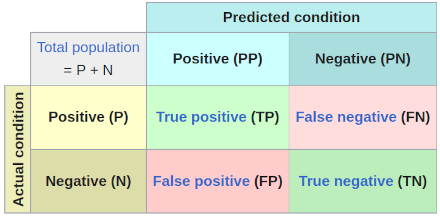

De la matriz de confusión se pueden sacar medidas derivadas.

Las más frecuentes son:
- **Precision**: <br>
_Precision_=1 significa que todos los ejemplo estimados como positivos efectivamente lo eran.<br> Es la proporción de verdaderos positivos (TP) sobre la suma de verdaderos positivos y falsos positivos (FP). Se calcula como: 
    $$Precision = \frac{TP}{TP + FP}$$

- **Recall**: <bR>
_Recall_=1 significa que todos los ejemplos positivos han sido estimados correctamente. <br> Es la proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos negativos (FN). Se calcula como: 
    $$Recall = \frac{TP}{TP + FN}$$

- **F1-score**: Es la media armónica entre Precision y Recall. Se calcula como: 
    $$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

- **Accuracy**: Es el porcentaje total de aciertos. Se calcula como: 
    $$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

### Curva ROC y AUROC

La curva ROC es diferente a la matriz de confusión porque se calucla para todo el rango que posibles umbrales $\theta$, mientras que la matriz de confusión ya asume un $\theta$ fijado, y eso no permite ver como se comporta el modelo con diferentes cantidades de datos.

Modiendo el área bajo la curva ROC (_Area Under ROC_, AUROC) podemos comparar modelos. `Cuanto MAYOR sea AUROC, mejor es el modelo`

### Matriz de Confusión:

La matriz de confusión muestra en la diagonal principal los Verdaderos positivos y negativos y en la segunda diagonal los falsos negativos y positivos en un umbral específico indicado.
$$
\begin{bmatrix}
\text{True Positive} & \text{False Negative} \\
\text{False Positive} & \text{True Negative}
\end{bmatrix}
$$

### Ejemplo:

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [ ]:
# Entrenamiento del modelo de regresión logística
model = LogisticRegression()
model.fit(df_pca, df_OneHot['versicolor'])

# Cálculo de las probabilidades
y_score = model.predict_proba(df_pca)[:, 1]

# Cálculo de la curva ROC y AUC
fpr, tpr, thresholds = roc_curve(df_OneHot['versicolor'], y_score)
roc_auc = auc(fpr, tpr)

In [ ]:
# Visualización de la curva ROC
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Mostrar resultados
# print('\n',
#       pd.DataFrame({'fpr':fpr,            # Valor False Positive Rate
#                     'tpr':tpr,            # Valor True Positive Rate
#                     'th':thresholds}))    # Valor del Umbral de Decisión

print(f'\nAUROC {roc_auc:0.3f}')

El motivo de que la curva tenga ese aspecto de escalera es que se ha calculado sobre los ejemplos de test, que son "pocos" (6 ejemplos para setosa, 37 si se prueba con veriscolor).

Al ver `y_score` ordenado nos damos cuenta de que, si comenzamos con un umbral = 0 tenemos un TPR del 100%.<br> En el `eje x` se va disminuyendo el umbral de decisión, al comenzar con el umbral más alto es muy dificil que los ejemplos lo pasen y por eso comienza con valores tan bajos, en cambio, a medida que vamos disminuyendo el valor del umbral vamos aceptando más datos y el área bajo la curva crece.

Una vez seleccionamos un umbral de probabilidad, podemos estimar las etiquetas de los ejemplos de test y escribir la matriz de confusión.

In [ ]:
#Matriz de confusión:

from sklearn.metrics import confusion_matrix

# Definición del umbral
umbral = 0.2596  # puedes cambiar este valor

# Predicciones del modelo con el umbral definido
y_pred = [1 if prob > umbral else 0 for prob in y_score]

# Cálculo de la matriz de confusión
confusion_mat = confusion_matrix(df_OneHot['versicolor'], y_pred)

print(f'Matriz de confusión:\n{pd.DataFrame(confusion_mat)}')


## 13_SVM: (`Teoría`)

### Máquinas de vectores soporte (`Introducción`)

Las máquinas de vectores soporte son un modelo que se aprende con una función de pérdida totalmente diferente a lo que hemos visto hasta ahora.

Además introducen un concepto muy potente e importante en ML: las máquinas _Kernel_.

La expresión final con la que se calculan los parámetros óptimos del modelo se obtiene tras mucha manipulación matemática en la que NO vamos a profundizar en tu totalidad, pero sí hasta un punto bastante avanzado.

En concreto, aprenderemos el planteamiento del problema de optimización y como se convierte en otro (_dual_) que es más asequible y que, además, hace posible la utilización de _Kernels_ (de ahí su nombre).

La estructura de este tema es la siguiente:
1. Modelo lineal con márgenes rígidos (_hard_)
2. Modelo lineal con márgenes laxos   (_soft_)
3. Modelo no lineal = máquinas kernel

In [ ]:
#-- Visualización de diferentes modelos --#
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

def plot_dataset(X,y):
  plt.scatter(X[y == 0, 0], X[y == 0, 1],
              c='red', marker='o', s=15, label='Clase 0')
  plt.scatter(X[y == 1, 0], X[y == 1, 1],
              color='blue', marker='+', s=30, label='Clase 1')
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')

def plot_clf1(X):
  m = -1.
  b = 2.3
  rangeX = np.linspace(X[:,0].min(),X[:,0].max(),6)
  y = m*rangeX + b
  plt.plot(rangeX,y,'k:')

def plot_clf2(X):
  m = -1.
  b = -0.4
  rangeX = np.linspace(X[:,0].min(),X[:,0].max(),6)
  y = m*rangeX + b
  plt.plot(rangeX,y,'k--')

def plot_clf3(X):
  m = -4
  b = 2
  rangeX = np.linspace(X[:,0].min(),X[:,0].max(),6)
  y = m*rangeX + b
  plt.plot(rangeX,y,'k-.')

def plot_clf4(X):
  m = -1
  b = 1
  rangeX = np.linspace(X[:,0].min(),X[:,0].max(),6)
  y = m*rangeX + b
  plt.plot(rangeX,y,'k')

#- Script de ejecución
n_samples=200
centers = [[-4,-4],[4,4]]
cluster_std = [2,2]
n_features = 2

X, y = make_blobs(n_samples=n_samples,
                  centers=centers,
                  cluster_std=cluster_std,
                  n_features=2,
                  random_state=1460)
plot_dataset(X,y)
plot_clf1(X); plot_clf2(X); plot_clf3(X); plot_clf4(X)
plt.axis([-10,10,-10,10]); plt.show()

Cada línea que vemos en la imagen de arriba representa la separación que realiza un modelo diferente.

En este caso, el modelo representado con una línea continua es el mejor debido a que es el que tiene mayor margen respecto a los datos. 

Esto es lo que se busca en SVM, aumentar el margen aunque nos comamos con eso algunos errores de datos mal clasificados.

### Explicación teórica:

El plano separador son todos aquellos puntos que satisfacen la ecuación $w_0 + {\bf w}^\top{\bf x} = 0,~$ que para el caso particular de esta explicación queda:
$$
w_0 + w_1x_1 + w_2x_2 = 0.
$$

Por otro lado, podemos definir el plano separador sobre el plano $\overline{X_1X_2}$ a partir de un punto $(0,b)$ y un vector director $(v_1, v_2)$ con la ecuación
$$
x_2 = \left(\frac{v_2}{v_1}\right)x_1 + b
$$

De las dos expresiones se deduce que:
$$
\left(-b\right) + \left(-\frac{v_2}{v_1}\right)x_1 + \left(1\right)x_2 = 0,
\quad\text{ pero también que}\quad
\left(b\right) + \left(\frac{v_2}{v_1}\right)x_1 + \left(-1\right)x_2 = 0.
$$
De los dos, elegimos el de la izquierda. El motivo se muestra un poco más abajo.

Por último, recordamos que el vector característico del plano separador son los coeficientes $(w_1, w_2).$

In [ ]:
#-- Representación de los vectores --#
def hiperplane(X, v, b):
    return b + (v[1]/v[0])*X

bound = 5
Ns = 6
v = [0.5, -1.]
b = 2

#- obtención de los pares (x_1,x_2) que pertenecen al hiperplano
v = np.expand_dims(v , axis=1) #<- conversión a vector columna
x1_clf = np.linspace(-bound,bound,Ns)
x2_clf = hiperplane(x1_clf, v, b)

#- cálculo del vector característico
m = v[1]/v[0]
w = [-b, -m[0], 1.]
w = np.expand_dims(w , axis=1) #<- conversión a vector columna

#- comentario en pantalla
print(f'El vector director V es: {v.T}')
print(f'El vector perpendicular a V es: W = {w[1:].T}')
print(f'El punto de intercepción b = {b}, que da lugar a término independiente w_0 = {w[0]}')

#- figura
plt.plot(x1_clf, x2_clf, 'k');
plt.scatter(0,b,c='k')
plt.arrow(0, b, float(v[0]), float(v[1]),
              width=.1, head_length=.4, alpha=0.8, color='r' )
plt.arrow(0, b, float(w[1]), float(w[2]),
              width=.1, head_length=.4, alpha=0.8, color='b' )
plt.arrow(0, 0, float(v[0]), float(v[1]),
              width=.1, head_length=.4, alpha=0.3, color='r' )
plt.arrow(0, 0, float(w[1]), float(w[2]),
              width=.1, head_length=.4, alpha=0.3, color='b' )

plt.text(0, b, f'b={b}  ', horizontalalignment='right')
plt.text(v[0], v[1], f'  vector\n  director\n  $(v_1,v_2)$', c='red')
plt.text(w[1], w[2], f'  vector\n  caracteristico\n   $(w_1,w_2)$', c='blue')

plt.xlabel('$x_1$'); plt.ylabel('$x_2$'); plt.title('hiperplano en $X_1X_2$')
plt.axis([-bound,bound,-bound,bound]); plt.grid(); plt.show()

Como sabemos, la clase $+$ se asigna a un ejemplo $\bf x$ cuando $f({\bf x},{\bf w}) = w_0 + w_1x_1 + w_2x_2 > 0$.

Entonces, de las dos posibilidades, elegimos aquella que deje la clase $+$ "encima" del hiperplano clasificador. <br>
Esto ocurre en la que estaba más a la izquierda, o sea
$$
w_0 = -b \quad,\quad  w_1 = -\frac{v_2}{v_1} \quad,\quad  w_2 = 1
$$
En el siguiente código se muestra que, efectivamente, la clase positiva es la que queda por "encima" del plano separador.

También podemos ver que el vector característico "apunta" hacia la clase $+$.

El código además muestra otros dos planos paralelos, uno por encima, que corta en $~(b+1)~$ y otro por debajo, que corta en $~(b-1)~$. <br>
Estos planos extra definirán nuestro **margen** en breve. `Esto es a lo que nos referíamos antes de dejar un margen`

In [ ]:
#-- Visualización del margen con respecto al plano --#
def classifier(X, w):
    return np.matmul(w[1:].T, X) + w[0]

#- hacemos un barrido del espacio X y probamos con cada par de puntos
#  si el resultado está por encima o por debajo del plano separador
Ns = 15
rangeX0 = np.linspace(-bound, bound, Ns)
rangeX1 = np.linspace(-bound, bound, Ns)
[XX0, XX1] = np.meshgrid(rangeX0, rangeX1)
X0 = np.expand_dims(XX0.ravel(), axis=0)
X1 = np.expand_dims(XX1.ravel(), axis=0)
X = np.vstack((X0,X1))

yhat = classifier(X, w) #<- clasificamos cada punto del barrido

#- Figura
flag_arrows  = True
flag_margins = True

plt.scatter(X0[yhat>0], X1[yhat>0], marker='$+$', s=99, alpha=0.4)
plt.scatter(X0[yhat<0], X1[yhat<0], marker='$-$', s=99, alpha=0.4)

if flag_arrows:
    plt.arrow(0, b, float(v[0]), float(v[1]),
              width=.2, head_length=.5, alpha=0.8, color='r' )
    plt.arrow(0, b, float(w[1]), float(w[2]),
              width=.2, head_length=.5, alpha=0.8, color='b' )

if flag_margins:
    plt.plot(x1_clf, x2_clf,'k')
    plt.plot(rangeX0, hiperplane(rangeX0, v, b+1), '--k')
    plt.plot(rangeX0, hiperplane(rangeX0, v, b-1), ':k')
    plt.scatter([0, 0, 0] ,[b-1, b, b+1],c='k')

plt.xlabel('$x_1$'); plt.ylabel('$x_2$'); plt.title('hiperplano en $X_1X_2$')
plt.axis([-bound,bound,-bound,bound]); plt.grid(); plt.show()

#### Distancia del hiperplano al origen

La distancia del plano separador al origen se calcula geométricamente siguiendo los pasos de la figura de abajo.

- Por construcción se deduce que la distancia $~d = b \sin (\gamma)$.
- Para obtener el $\sin(\gamma)$ usamos el vector característico. <br>
  - El vector característico se descompone en su componente horizontal y vertical.
  - Sabemos que la vertical $~w_2 = 1 = \Vert {\bf w} \Vert \sin (\gamma)$.

Por tanto $~ d = \frac{b}{\Vert {\bf w} \Vert}$

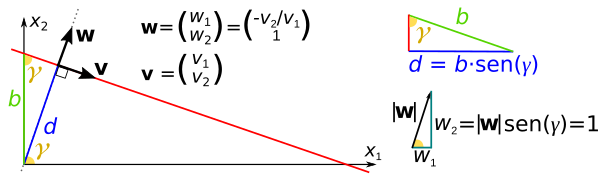

**Importante**
- La distancia $~d~$ NO depende del tamaño de ${\bf v}$.
> Si multiplicamos por una constante a ${\bf v}$ cambiará su tamaño pero no su pendiente respecto del eje horizontal $m = v_2/v_1$. <br>
Precisamente esa inclinación es (con signo menos) la componente horizontal de ${\bf w} = w_1$, y la componente vertical está fija en $w_2=1.$

El siguiente código muestra la distancia al origen del ejemplo que estamos siguiendo.


In [ ]:
#-- Distancia al origien del ejemplo --#
print(f'w = {w.T}')
norma_w = np.sqrt( np.matmul(w[1:].T,w[1:]) )
print(f'norma de w = {norma_w}')
d = b/norma_w
print(f'distancia al origen d = {d}')

### Márgenes:

En SVM el **margen** es la zona interior delimitada por dos superficies paralelas a la superficie de decisión, una por encima y otra por debajo.

Estamos asumiendo el modelo lineal $w_0 + w_1x_1 + w_2x_2$, cuya superficie de separación pasa por el punto $~(0,b).$

Creamos 2 planos paralelos:
- uno por encima, que pase por el punto $~(0, b+1),~$
cuya  distancia al origen es
$d^{(+)} = \frac{b+1}{\Vert {\bf w} \Vert}$.
- otro por debajo, que pase por $~(0, b-1),~$
cuya distancia al origen es
$d^{(-)} = \frac{b-1}{\Vert {\bf w} \Vert}$.

El **margen** $\varepsilon~$ es la distancia que hay entre los dos planos paralelos, es decir:
$$
 \varepsilon = d^{(+)} - d^{(-)} = \frac{b+1 -(b-1)}{\Vert {\bf w}\Vert} = \frac{2}{\Vert{\bf w}\Vert}
$$


El margen $\varepsilon$ CRECE cuando la norma $\Vert\bf w \Vert$ DECRECE

Por tanto, para **maximizar** $\varepsilon$ tenemos que **minimizar** $\Vert\bf w\Vert$.

Y esto implica que el margen depende del modelo, puesto que $~{\bf w}~$ son sus parámetros.

En otras palabras, modificando los parámetros del modelo aumentamos o disminuimos el márgen.

#### Márgenes laxos

`Con márgenes rígidos (_hard_) sólo es posible encontrar solución al problema si el conjunto de datos se puede separar con un clasificador lineal.`

`Un solo ejemplo que no cumpla la restricción hace que no haya solución.`

Para resolverlo se utilizan márgenes laxos (_soft_), que permiten ejemplos en la "zona de exclusión" PERO penalizándolos con un término extra de regularización.

En la imagen de abajo se muestra la diferencia entre ambos.<BR>
 Los ejemplos marcados con un circulo son ejemplos que están penalizados, pero a cambio el margen ha aumentado mucho y el plano clasificador es diferente.


 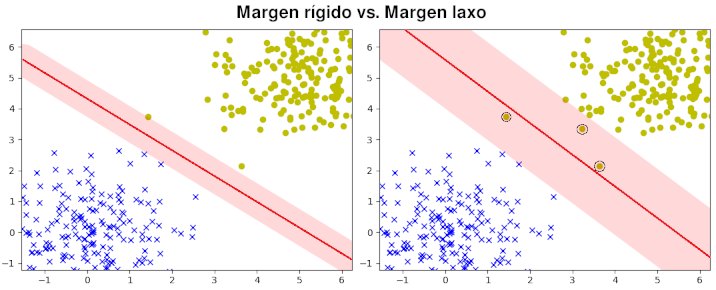

Los márgenes laxos introducen una variable _**slack**_ $~\zeta^{(i)}~$ para cada ejemplo, $~i=1,2,\ldots,N;$ tal que:
- $\zeta^{(i)} = 0~$ si el ejemplo $~{\bf x}^{(i)}~$ está correctamente clasificado y fuera del margen,
- $0 < \zeta^{(i)} < 1~$ si el ejemplo $~{\bf x}^{(i)}~$ está correctamente clasificado PERO dentro del margen,
- $\zeta^{(i)} > 1~$ si el ejemplo $~{\bf x}^{(i)}~$ está mal clasificado.

Es decir, la restricción se convierte en:
$$
(y)\cdot(w_0 + w_1x_1 + w_2x_2) > 1-\zeta
$$
De esta manera $~\zeta~$ "afloja" la restricción cuando el resultado de $~(y)\cdot(w_0 + w_1x_1 + w_2x_2)~$ no llega a superar 1, bajándolo hasta $1-\zeta$.

|   |
|---|
| `Algo <i>slack</i> es algo que no está apretado, que está aflojado` |

Pero ADEMÁS hay que añadir todos los $~\zeta^{(i)}~$ al problema de minimización para penalizar aquellos que sean mayores que 0.

De esta manera llegamos a la formulación completa del problema de optimización de SVM

### Formulación Dual:

Comenzamos recopilando la función objetivo que queremos minimizar y las restricciones
$$
  \begin{array}{ll}
	\mathop {\min }\limits_{{\bf w},\zeta} &
	\frac{1}{2}{\bf w}^\top{\bf w}  +  C \sum\limits_{i=1}^{N} \zeta^{(i)}, \\
	 \text{sujeto a}  &
	 \left\lbrace
	   \begin{array}{l}
	    \left({y^{(i)}}~\right)\cdot(w_0 + w_1x_1 + w_2x_2) > 1-\zeta^{(i)}  \\
	    \zeta^{(i)} \ge 0  \\
	    i = 1,2,\ldots,N.
	   \end{array}
	 \right. \\
  \end{array}
$$

Para simplificar las expresiones dejaremos de escribir que las variables _slack_ son no-negativas y que $i$ son enteros desde 1 hasta $N$.

A continuación,
- reescribimos la restricción
$\quad \left({y^{(i)}}~\right)\cdot(w_0 + w_1x_1 + w_2x_2) -1 +\zeta^{(i)}  > 0 $
- generalizamos a $D$ características, y por tanto $~D+1~$ parámetros $~\{w_0, w_1, w_2, \ldots, w_D\}.~$ De esta manera:
	- el vector ${\bf w}=[w_1,\ldots,w_D]^\top$
	- la restricción se reescribe como
	  $~ \left({y^{(i)}}~\right)\cdot(w_0 + {\bf w}^\top{\bf x}) -1 +\zeta^{(i)}  > 0 $

<u>En definitiva</u>, el problema de optimización que se plantea para clasificadores SVM lineales es:
$$
  \begin{array}{ll}
	  \mathop {\min }\limits_{{\bf w},w_0,\zeta} &
	  \frac{1}{2}{\bf w}^\top{\bf w}  +  C \sum\limits_{i=1}^{N} \zeta^{(i)}, \\
	  \text{sujeto a}  & \left({y^{(i)}}~\right) \left(w_0+{\bf w}^\top{\bf x} \right) - 1 + \zeta^{(i)} \ge 0  
  \end{array}
$$

#### Aplicación de Multiplicadores de Lagrange:

Recordamos que este método consiste en añadir (restando) las restricciones a la función objetivo multiplicadas por un factor denominado "multiplicador de Lagrange".

Como $i=\{1,2,\ldots, N\}, ~$ tenemos $N$ restricciones (una por cada ejemplo de entrenamiento). De esta manera se obtiene el _Lagrangiano_:

$$ \mathcal L =
\frac{1}{2}{\bf w}^\top{\bf w} + C \sum\limits_{i=1}^{N}\zeta^{(i)}
-
\sum\limits_{i=1}^N \alpha_i\left((y^{(i)})(w_0+{\bf w}^\top {\bf x}^{(i)} ) – 1 + \zeta^{(i)}\right),
$$

donde $\alpha_i$ son los multiplicadores de Lagrange.

Así que buscamos los parámetros que minimizan el Lagrangiano, es decir
$~~
\mathop{\arg\min}\limits_{ {\bf w}, w_0, \zeta^{(i)} } \mathcal L.
$

Para localizar el mínimo derivamos respecto de las variables e igualamos a cero.

$$
\begin{align}
\frac{\partial \mathcal L}{ \partial {\bf w} } &= 0;\quad
   {\bf w} - \sum\nolimits_{i=1}^N \alpha_i y^{(i)} {\bf x}^{(i)} = 0;\quad
   {\bf w} = \sum\nolimits_{i=1}^N \alpha_i y^{(i)} {\bf x}^{(i)} \\[1em]
\frac{\partial \mathcal L}{ \partial w_0} &= 0;\quad
   \sum\nolimits_{i=1}^N \alpha_i y^{(i)} = 0;\quad \\[1em]
\frac{\partial \mathcal L}{ \partial \zeta^{(i)}} &= 0;\quad
   C - \alpha_i = 0.
\end{align}
$$
y sustituimos las igualdades resultantes en el Lagrangiano.

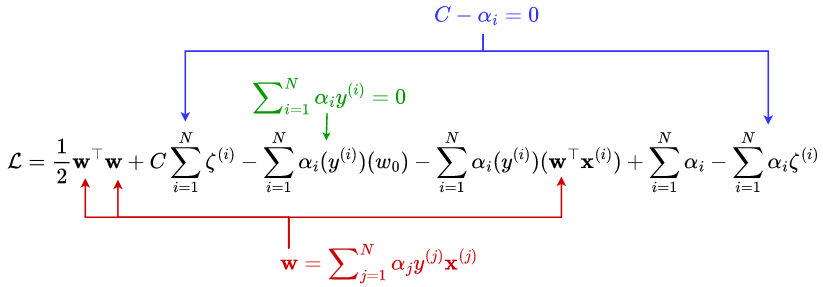

#### Nuevo problema de optimización:

En el método de multiplicadores de Lagrange ahora tenemos que maximizar respecto de cada $\alpha^{(i)}$; es decir
$$
  \mathop{\arg\max}\limits_{\alpha^{(i)}} \left(
  \sum_{i=1}^{m} \alpha^{(i)} -
	\frac{1}{2}\sum\limits_{i=1}^{N}\sum\limits_{j=1}^{N}\alpha^{(i)}\alpha^{(j)}y^{(i)}y^{(j)}{\bf x}^{(i)\top}{\bf x}^{(j)}  
  \right).
$$
La diferencia es que este problema ahora solo tiene como restricciones que los multiplicadores sean positivos o nulos. Además los multiplicadores son escalares mientras que en el problema orginal buscabamos el vector de parámetros.

Este problema es **mucho más** fácil de resolver ya que se puede atacar numéricamente con solución exacta.

Una vez resuelto se obtienen dos tipos de multplicadores:
$$
\left.\begin{array}{r}
\alpha = 0 \\
\alpha > 0
\end{array}
\right\rbrace
\rightarrow
\text{¿Qué pasa en cada caso?}
$$

Recordando que
$~{\bf w} = \sum\nolimits_{i=1}^N \alpha_i y^{(i)} {\bf x}^{(i)},~$
un $\alpha^{(i)} = 0~$ provoca que el ejemplo $i$-ésimo **NO CONTRIBUYA** al cálculo de los parámetros del modelo.

Por el contrario, los $\alpha^{(i)} > 0~$ indican aquellos ejemplos que **SÍ** se utilizan para el modelo.

Es decir, son los ejemplos que **SOPORTAN** la máquina, mientras que los demás no tienen ninguna importancia e incluso se podrían eliminar. <br>
<small>_De ahí el nombre de este modelo_.</small>

#### Solución para el SVM lineal:

El resumen de esta sección es que la máquina SVM lineal tiene como parámetros óptimos:

$$
\begin{align}
 	{\bf w}^* &= \sum_{i=1}^{N}\alpha^{*(i)}y^{(i)}{\bf x}^{(i)}
 	\hspace{1em},
\\
 	w_0^* &= \frac{1}{n_s} \sum_{i:\alpha^{*(i)}>0}\left( (1-y^{(i)})({\bf w}^{*\top}{\bf x}^{(i)})  \right),
\end{align}
$$

y, por supuesto, la noción de que los ejemplos asociados a un $\alpha^{(i)}>0$ son los **vectores soporte.**

### El truco del Kernel

## 14_Decision_Tree

### Entropía de $y$ es:
  
$$
E = \left(-\frac{M_0}{M}\log_2\frac{M_0}{M} \right)
+  \left(-\frac{M_1}{M}\log_2\frac{M_1}{M} \right)
$$


### Índice de Gini
Dada una tabla de ejemplos asociada al vector $\bf y$ que contiene las etiquetas de cada ejemplo, el índice de impureza de Gini se calcula como:
$$
I = 1- \sum\limits_{k=1}^{n_c}p(y=k)^2,
$$
donde $n_c$ representa el número de clases distintas; y la probabilidad de una clase se aproxima por el número de veces que aparece esa clase entre el total de ejemplos; es decir $~p(y=k) = \frac{N_{y=k}}{N}$.

En el caso particular de clasificación binaria, donde $y\in\{0,1\}$ el índice de impureza de Gini queda:

$$
I = 1 - \left( \frac{N_{y=0}}{N} \right)^2 - \left( \frac{N_{y=1}}{N} \right)^2
$$



## 17_Naive_Bayes

$$
\fbox{$p(y=k|{\bf x}) = \frac{p(y = k) \cdot p({\bf x}|y = k)}{p({\bf x})}$}
$$

- $p(y = k) ~\rightarrow~$ Probabilidad **a priori** de una clase:
> _Cómo de probable es una etiqueta, sin ver los datos._

- $p({\bf x}|y = k)~\rightarrow~$ Modelo de **verosimilitud** de los ejemplos de una clase
> _Cuál es la distribución de los ejemplos de una misma clase._

- $p(y=k|{\bf x})~\rightarrow~$ Probabilidad **a posteriori** de una clase después de ver los ejemplos
> _Cómo de probable es una etiqueta, pero ahora conociendo los datos._

- $p({\bf x})~\rightarrow~$ Probabilidad **marginal** de los ejemplos
> _Esta probabilidad **NO** la usaremos, en seguida comprenderemos por qué._